<a href="https://colab.research.google.com/github/firsttimmr/Stock-Price-Prediction-Project-using-TensorFlow/blob/main/Stock_Price_Prediction_Project_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My first Neural Network

Importing necessary libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Reading the data

In [11]:
sample_data = pd.read_csv('all_stocks_5yr.csv')
print(sample_data.head())
print(sample_data.info())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None


Whenever we deal with the date or time feature, it should always be in the DateTime data type. Pandas library helps us convert the object date feature to the DateTime data type.

In [12]:
sample_data['date'] = pd.to_datetime(sample_data['date'])
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


Exploratory Data Analysis

Defining the lis of companies I want to plot

In [13]:
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']


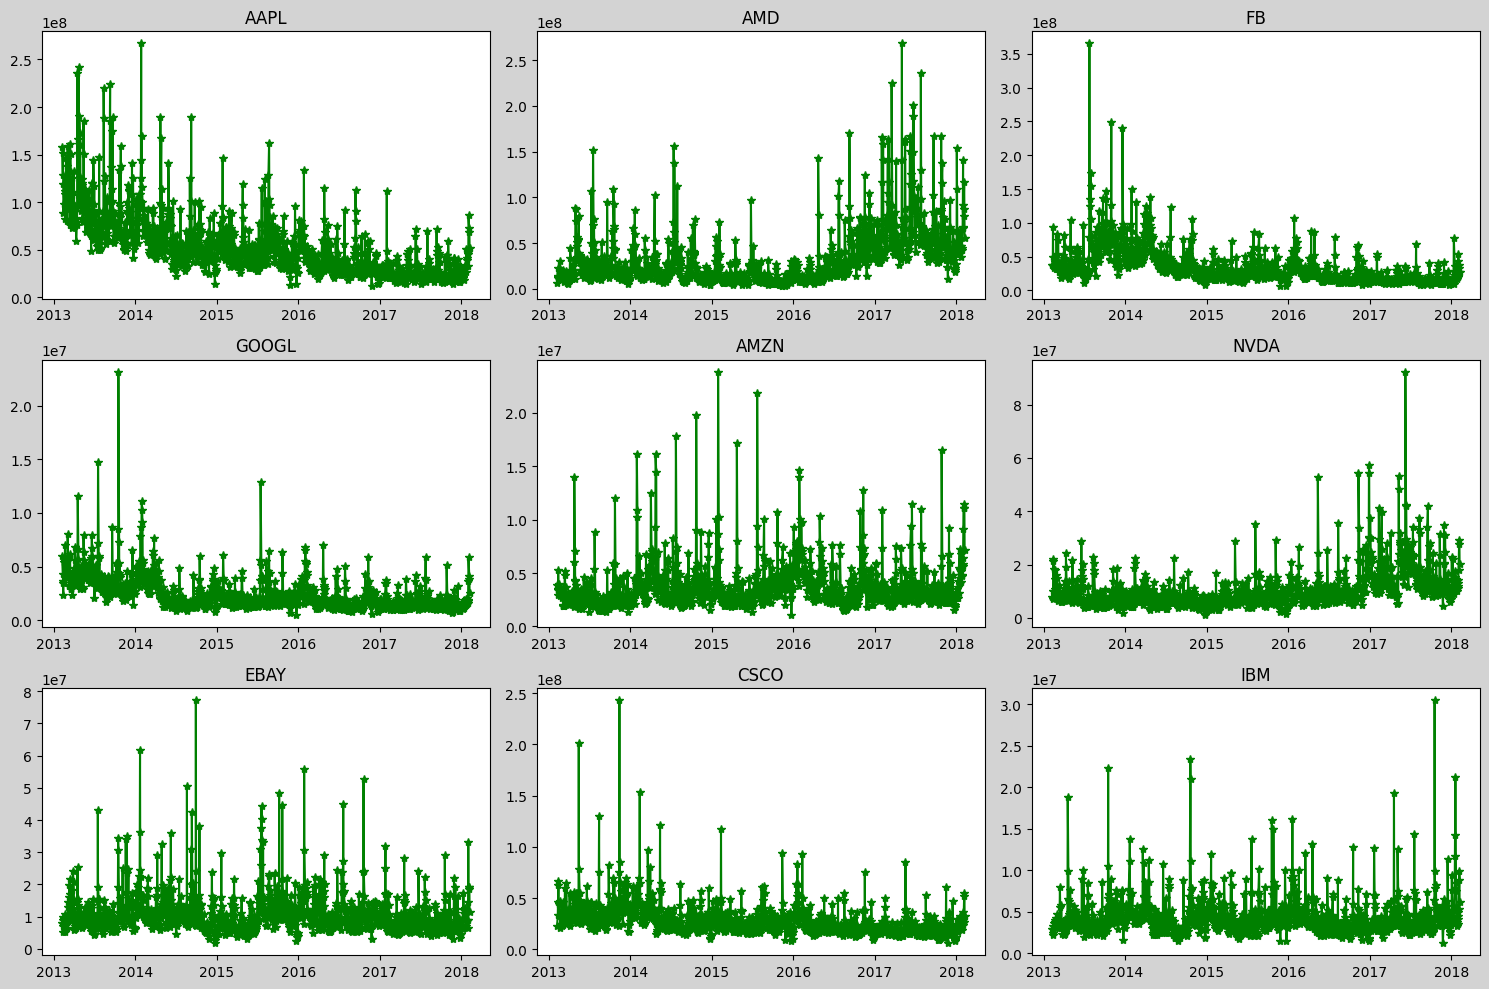

In [14]:
plt.figure(figsize=(15, 10),facecolor='lightgray',edgecolor='white')
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    plt.plot(sample_data[sample_data['Name'] == company]['date'], sample_data[sample_data['Name'] == company]['volume'],c='green',marker='*')
    plt.title(company)
    plt.tight_layout()


Taking a look at amazon stocks


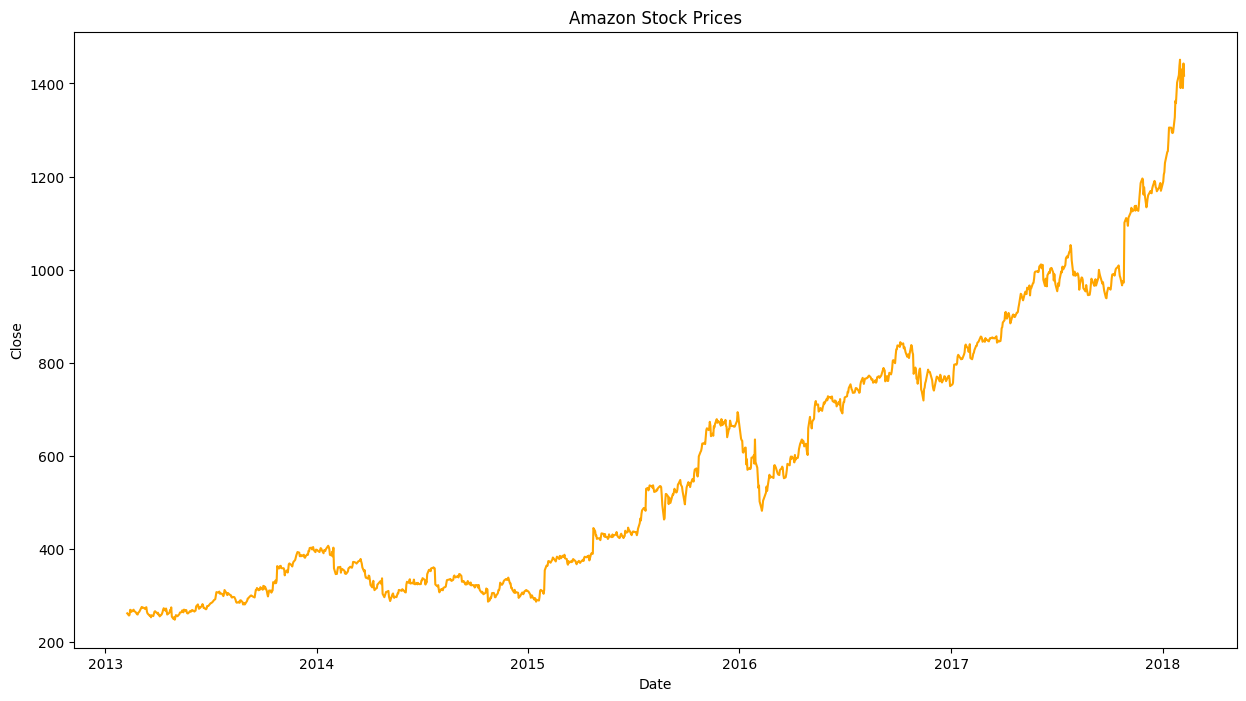

In [15]:
amazon = sample_data[sample_data['Name'] == 'AMZN']
amazon['date'] = pd.to_datetime(amazon['date'])
prediction_range = amazon[(amazon['date'] > pd.to_datetime('2013-01-01')) & (amazon['date'] < pd.to_datetime('2018-01-01'))]
plt.figure(figsize=(15, 8))
plt.plot(amazon['date'],amazon['close'],c='orange')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Amazon Stock Prices")
plt.show()


Splitting data in traing and testing data

In [16]:
close_data = amazon.filter(['close'])
dataset = close_data.values
training_data_len = int(np.ceil(len(dataset) * .90))
training_data_len
#

1134

Now we have the training data length, next applying scaling and preparing features and labels that are x_train and y_train.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01140805],
       [0.00746678],
       [0.0087057 ],
       ...,
       [0.94937056],
       [0.9933065 ],
       [0.97163787]])

In [18]:
x_train=[]
y_train =[]
for i in range(60,training_data_len):
  x_train.append(scaled_data[i-60:i,0])
  y_train.append(scaled_data[i,0])

In [19]:

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Build Gated RNN- LSTM network using TensorFlow

In [20]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

Model Compilation and Training

First...optimizers

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')
history =model.fit(x_train,y_train,epochs=10)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0208
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0039
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 0.0043
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0037
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0035
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0034
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0028
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0024
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0025
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0023


For predicting we require testing data, so we first create the testing data and then proceed with the model prediction

In [22]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)

Making and reshaping a test sample for the x_variable

In [23]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

Predicting the test


In [24]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


Evaluate Metrics to see how good the model predicts the data

In [25]:
mse = np.mean((predictions - y_test)**2)
print("MSE",mse)
print("RMSE",np.sqrt(mse))

MSE 1351.9004487759735
RMSE 36.7681988785958


Now that we have predicted the testing data, let us visualize the final results.

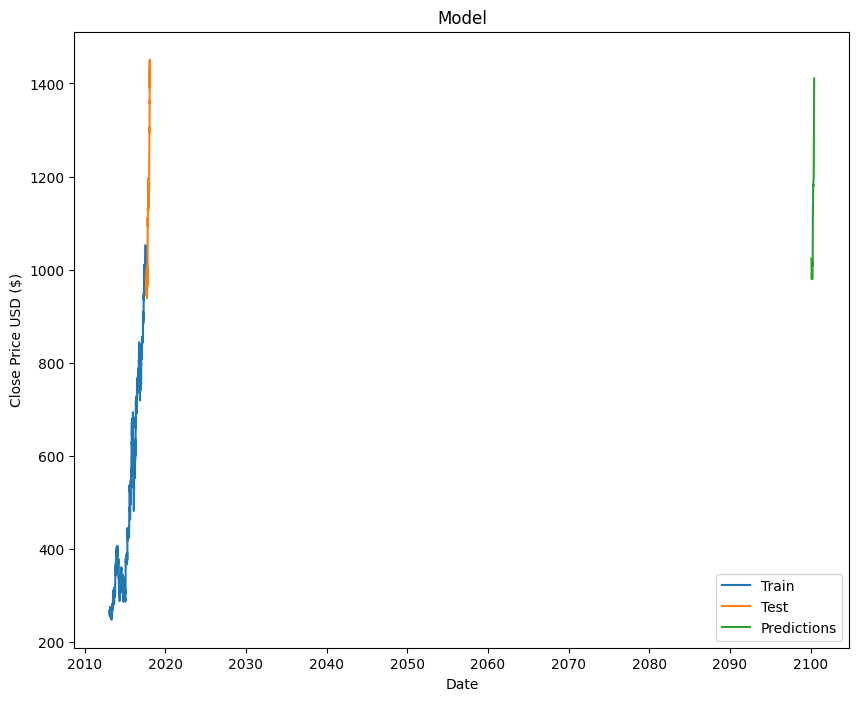

In [29]:
train = amazon[:training_data_len]
test = amazon[training_data_len:]
test['Predictions'] = predictions
plt.figure(figsize=(10,8))
plt.plot(train['date'],train['close'])
plt.plot(test['date'],test['close'],test['Predictions'])
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()


This project is courtesy of the websit geeks for geeks.
the link 'https://www.geeksforgeeks.org/stock-price-prediction-project-using-tensorflow/?ref=lbp'